In [1]:
from __future__ import division

import math
import os
import mne
from mne import io
from mne.event import define_target_events
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image

In [81]:
eeg= h5py.File('D:/001/arti/eegArti16to20/teethGrind/TeethGrind_subject_16_2019.08.12_13.15.04.hdf5', mode='r')
for title in eeg:
    print (title)

AsynchronData
RawData
SavedFeatues
Version


In [82]:
samples= np.array(eeg['RawData']['Samples'])#[0])
samples= samples.T
print (len(samples))

63


In [83]:
montage= mne.channels.read_montage('63electrodes', ch_names=None, path="D:/001/arti", unit='auto', transform=False)

In [84]:
ch_n=['Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3','AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6',
         'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 
         'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5',
         'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9',
         'F10', 'A1']
print (len(ch_n))

63


In [85]:
info= mne.create_info(ch_names= ch_n, sfreq= 2400, ch_types='eeg', montage=montage, verbose=None)

In [86]:
raw= mne.io.RawArray(data= samples, info= info)

Creating RawArray with float64 data, n_channels=63, n_times=326256
    Range : 0 ... 326255 =      0.000 ...   135.940 secs
Ready.


In [91]:
raw.filter(1., 100, n_jobs=1, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 7921 samples (3.300 sec)



<RawArray  |  None, n_channels x n_times : 63 x 326256 (135.9 sec), ~157.0 MB, data loaded>

In [92]:
sampletime = np.array(eeg['AsynchronData']["Time"])
time=sampletime/2400.0
print (sampletime)

[[ 49537]
 [ 78769]
 [103345]
 [127297]
 [151297]
 [175393]
 [199585]
 [223345]
 [247345]
 [271297]
 [295057]
 [319585]]


In [93]:
for i in range(1, len(sampletime)-1):
    current= i-1
    prev= i-2
    eve= sampletime[current]
    eve= np.hstack((eve, np.array(prev)))
    eve= np.hstack((eve, np.array(current)))
    if i==1:
        events= eve
    else:
        events= np.vstack((events,eve))
print (events)

[[ 49537     -1      0]
 [ 78769      0      1]
 [103345      1      2]
 [127297      2      3]
 [151297      3      4]
 [175393      4      5]
 [199585      5      6]
 [223345      6      7]
 [247345      7      8]
 [271297      8      9]]


1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1 events and 24001 original time points ...
0 bad epochs dropped
Original sampling rate: 2400.0 Hz
New sampling rate: 256.0 Hz


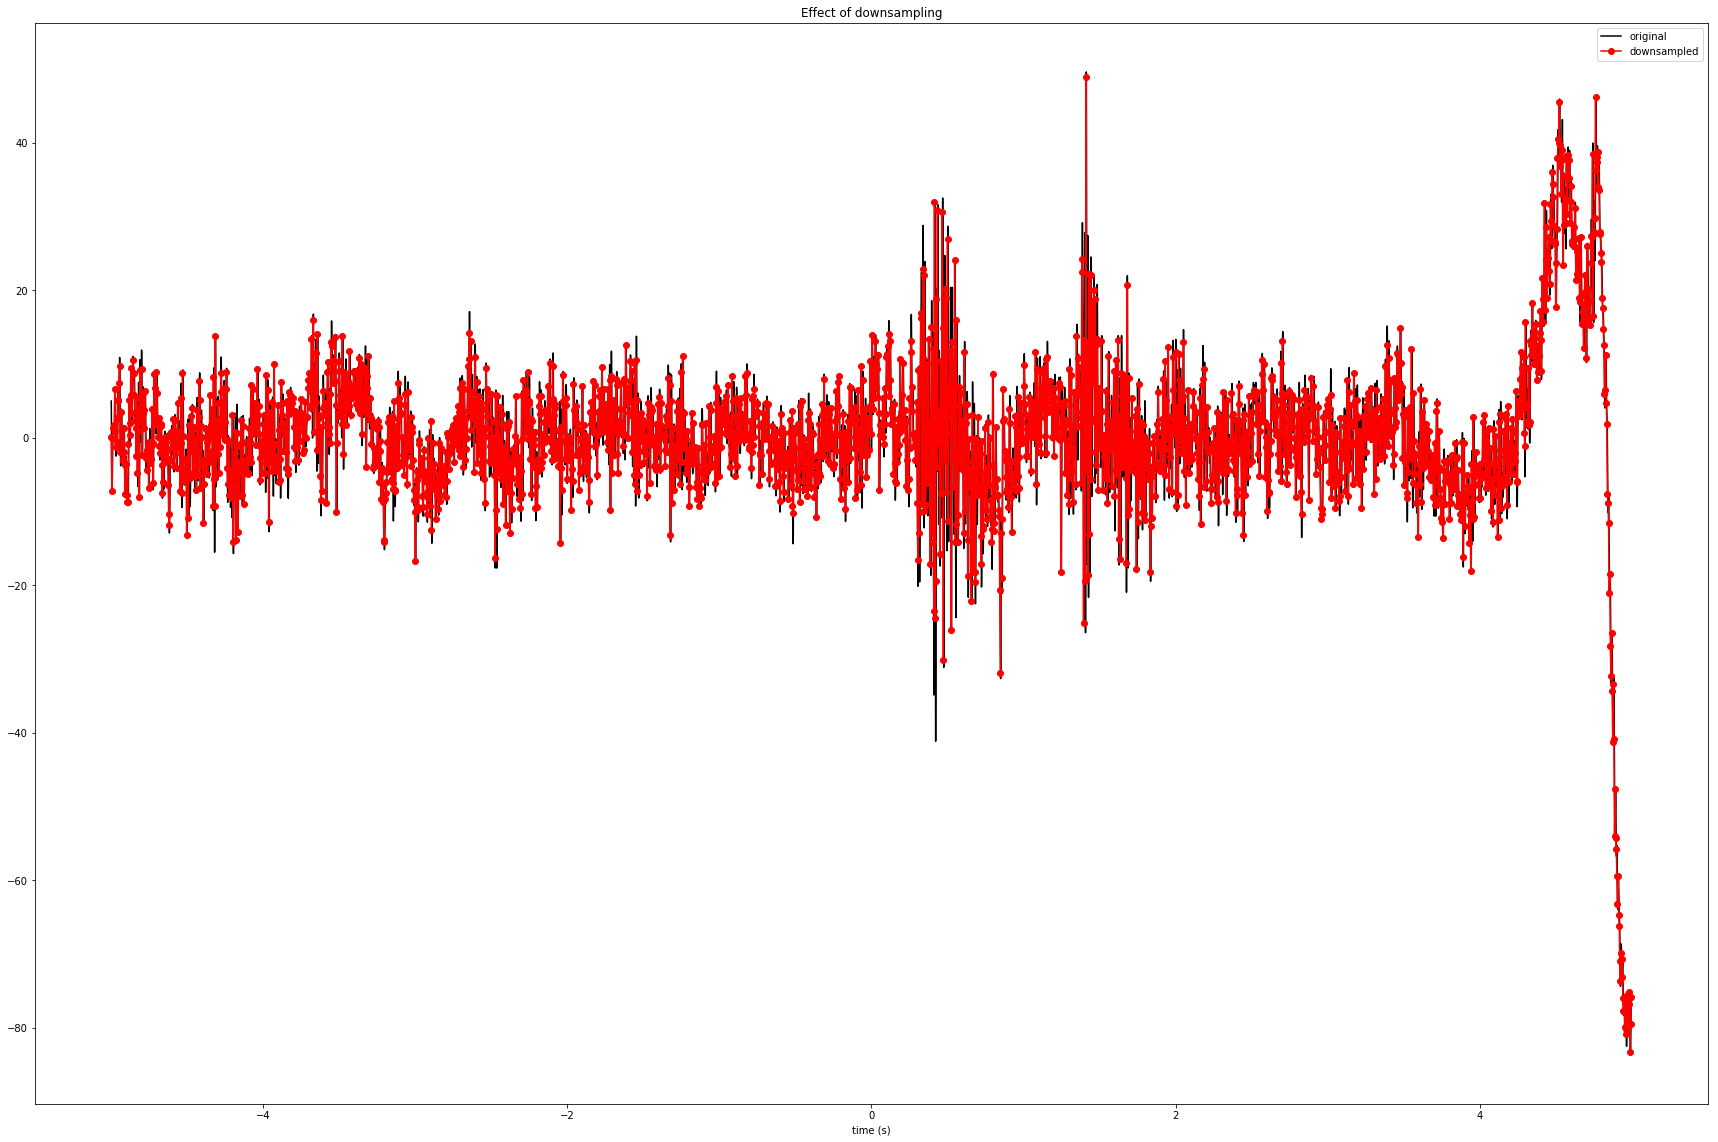

In [133]:
epochs = mne.Epochs(raw, events, event_id=8, tmin=-5, tmax=5, preload=True)
# Downsample to 512 Hz
print('Original sampling rate:', epochs.info['sfreq'], 'Hz')
epochs_resampled = epochs.copy().resample(256, npad='auto')
print('New sampling rate:', epochs_resampled.info['sfreq'], 'Hz')

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(24, 16))

n_samples_to_plot = int(10* epochs.info['sfreq'])  # plot 10 seconds of data
plt.plot(epochs.times[:n_samples_to_plot],
         epochs.get_data()[0, 60, :n_samples_to_plot], color='black')

n_samples_to_plot = int(10 * epochs_resampled.info['sfreq'])
plt.plot(epochs_resampled.times[:n_samples_to_plot],
         epochs_resampled.get_data()[0,60, :n_samples_to_plot],
         '-o', color='red')

plt.xlabel('time (s)')
plt.legend(['original', 'downsampled'], loc='best')
plt.title('Effect of downsampling')
mne.viz.tight_layout()

    Using multitaper spectrum estimation with 7 DPSS windows


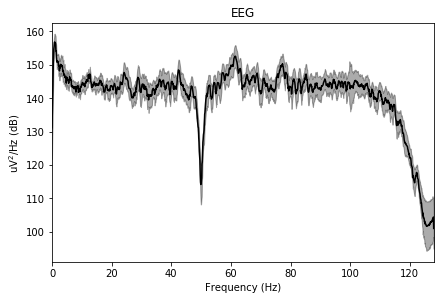

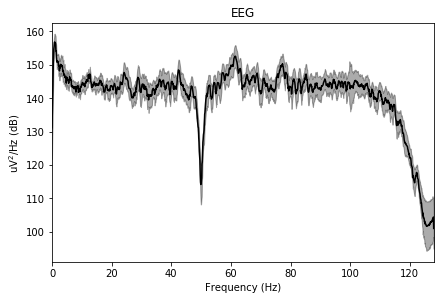

In [130]:
epochs_resampled.plot_psd()

In [134]:
epochs_resampled.save('D:/001/sample_audvis_meg_trunc_raw-epo.fif', overwrite= True)

Overwriting existing file.


In [135]:
raw1 = mne.read_epochs('D:/001/sample_audvis_meg_trunc_raw-epo.fif')

Reading D:/001/sample_audvis_meg_trunc_raw-epo.fif ...
    Found the data of interest:
        t =   -5000.00 ...    4996.09 ms
        0 CTF compensation matrices available
1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


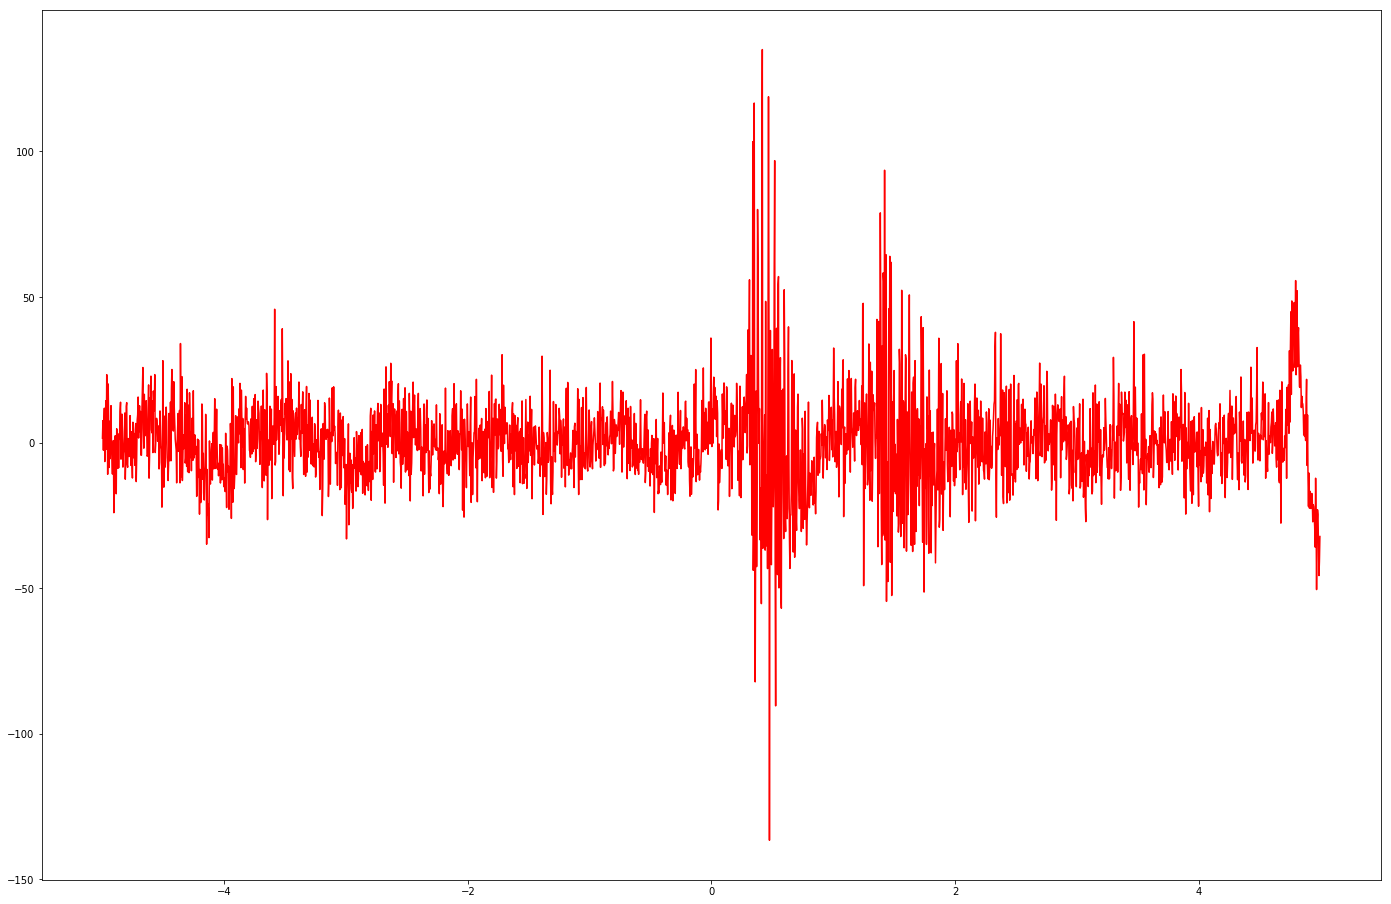

In [140]:
plt.figure(figsize=(24, 16))
plt.plot(raw1.times[:n_samples_to_plot],
         raw1.get_data()[0, 9, :n_samples_to_plot], color='red')